In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from PIL import Image

sns.set_style('darkgrid')

In [65]:
df = pd.read_feather('Data/4_seasons_goals_record')
df['Net Goal'] = df['Goal'] - df['Loss']
df.head()

,season,name,Goal,Loss,Net Goal
0,21-22 Season,Leicester City,58,58,0
1,22-23 Season,Wolverhampton Wanderers,29,50,-21
2,22-23 Season,Fulham FC,50,47,3
3,22-23 Season,West Ham United,38,50,-12
4,20-21 Season,Fulham FC,27,51,-24


In [3]:
df = df.sort_values('season')

In [58]:
table_data = [
    ['19-20 Season', 4, 2, 1, 8, 6, 3],
    ['20-21 Season', 4, 1, 3, 8, 7, 2],
    ['21-22 Season', 3, 1, 2, 5, 4, 6],
    ['22-23 Season', 12, 1, 5, 2, 8, 3],
 ]

[['19-20 Season', 39.0, 51.0, 62.0, 63.0, 40.0, 44.0, 49.833333333333336],
 ['20-21 Season', 53.0, 57.0, 66.0, 78.0, 71.0, 64.0, 64.83333333333333],
 ['21-22 Season', 56.0, 74.0, 91.0, 96.0, 57.0, 64.0, 73.0],
 ['22-23 Season', 81.0, 35.0, 68.0, 90.0, 50.0, 61.0, 64.16666666666667],
 ['Total', 57.25, 54.25, 71.75, 81.75, 54.5, 58.25, 62.958333333333336]]

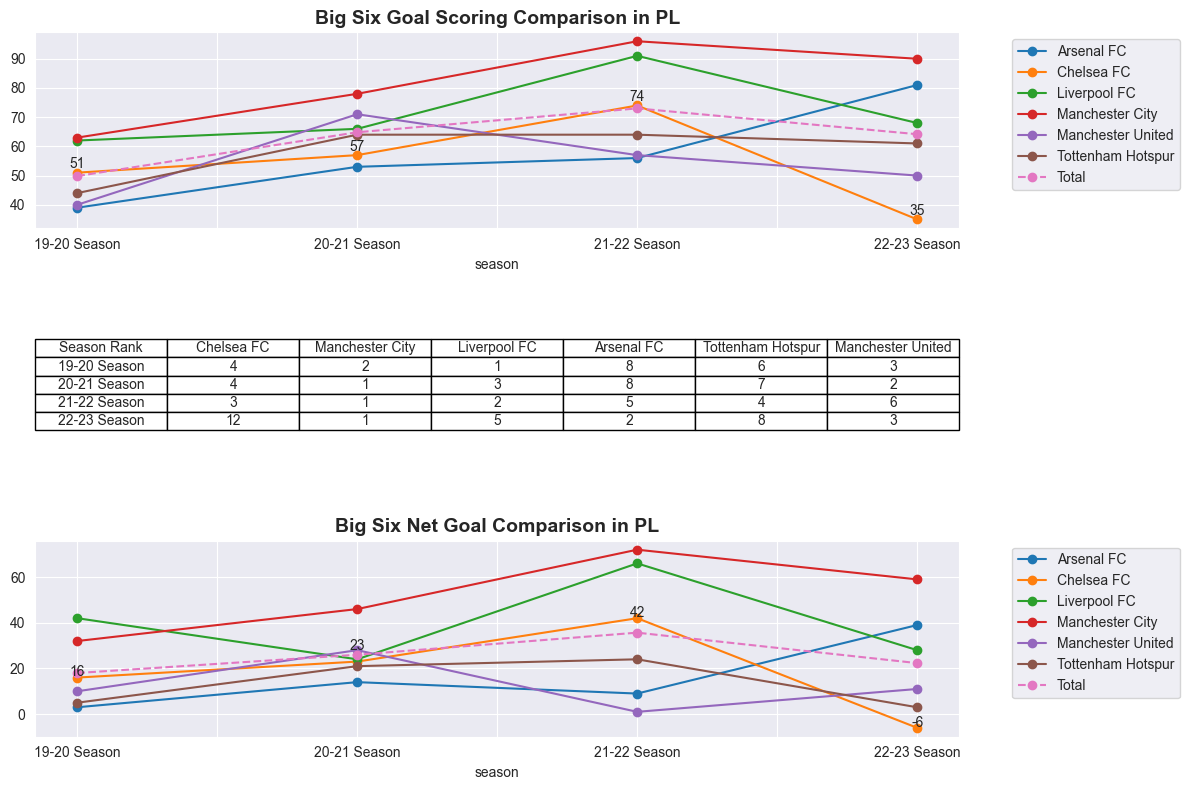

In [69]:
import matplotlib.pyplot as plt

bigsix = ['Chelsea FC', 'Manchester City', 'Liverpool FC', 'Arsenal FC', 'Tottenham Hotspur', 'Manchester United']

df_goal = df[df['name'].isin(bigsix)].pivot_table(
    values='Goal',
    index='season',
    columns='name',
    margins=True,
    margins_name='Total'
)

df_net_goal = df[df['name'].isin(bigsix)].pivot_table(
    values='Net Goal',
    index='season',
    columns='name',
    margins=True,
    margins_name='Total'
)

df_goal = df_goal.iloc[:-1,:]
df_net_goal = df_net_goal.iloc[:-1,:]

# Create the table data
table_data = [
    ['19-20 Season', 4, 2, 1, 8, 6, 3],
    ['20-21 Season', 4, 1, 3, 8, 7, 2],
    ['21-22 Season', 3, 1, 2, 5, 4, 6],
    ['22-23 Season', 12, 1, 5, 2, 8, 3],
 ]
column_labels = ['Season Rank', 'Chelsea FC', 'Manchester City', 'Liverpool FC', 'Arsenal FC', 'Tottenham Hotspur', 'Manchester United']

plt.figure(figsize=(12, 8))

# Create the line plot
ax_plot = plt.subplot(311)
df_goal.plot(kind='line', marker='o', ax=ax_plot)

# Customize the line style for the 'Total' column
ax_plot.lines[-1].set_linestyle('--')  # Set the last line (Total) to dotted

# Move the legend outside the plot
ax_plot.legend(bbox_to_anchor=(1.05, 1), loc='best')

# Annotate the data points for Chelsea FC
i = 0
for x, y in df_goal['Chelsea FC'].items():
    if x != 'Total':  # Skip the total row for annotation
        plt.text(i, y + 0.5, f'{int(y)}', ha='center', va='bottom')
        i += 1

ax_plot.set_title('Big Six Goal Scoring Comparison in PL', fontsize=14, fontweight='bold')

# Create the line plot
ax_plot = plt.subplot(313)
df_net_goal.plot(kind='line', marker='o', ax=ax_plot)

# Customize the line style for the 'Total' column
ax_plot.lines[-1].set_linestyle('--')  # Set the last line (Total) to dotted

# Move the legend outside the plot
ax_plot.legend(bbox_to_anchor=(1.05, 1), loc='best')

# Annotate the data points for Chelsea FC
i = 0
for x, y in df_net_goal['Chelsea FC'].items():
    if i == 1: 
        plt.text(i, y + 5, f'{int(y)}', ha='center')
    else:
        plt.text(i, y + 0.5, f'{int(y)}', ha='center')
    i += 1

ax_plot.set_title('Big Six Net Goal Comparison in PL', fontsize=14, fontweight='bold')

# Create the table
ax_table = plt.subplot(312)
ax_table.axis('off')
table = plt.table(cellText=table_data, colLabels=column_labels, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1)

plt.tight_layout()
plt.show()
